<a href="https://colab.research.google.com/github/antonsysoev/Ass/blob/main/Example_DT_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tree")
install.packages("mlbench")
library(tree)
library(mlbench)

data('BostonHousing')
mydata <- BostonHousing

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
mydata

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [3]:
install.packages("rpart")
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



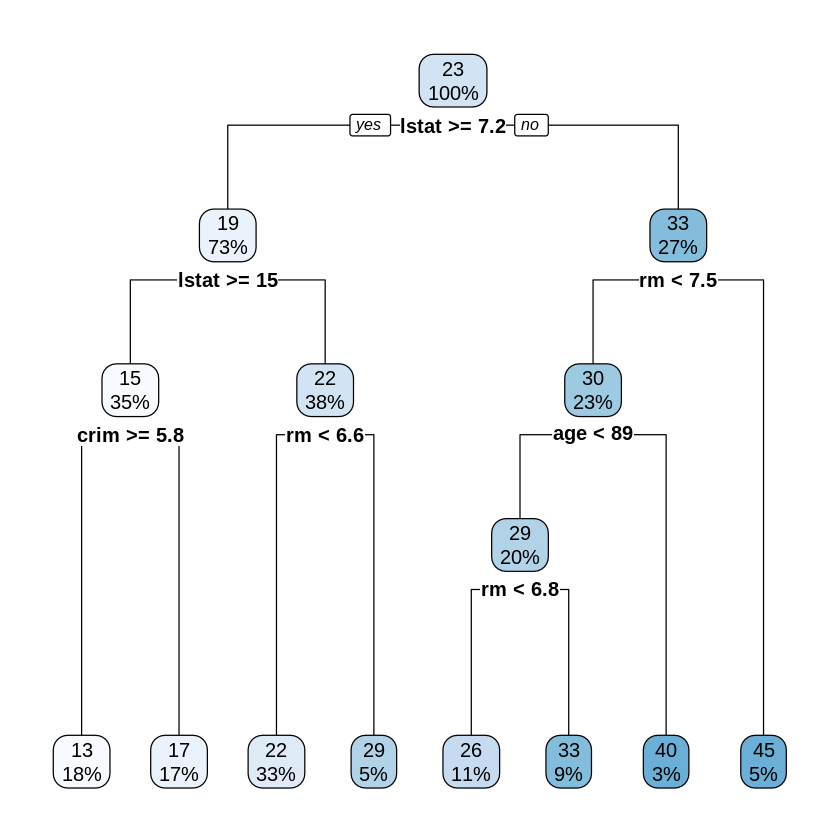

In [ ]:
set.seed(1234)
ind <- sample(2, nrow(mydata), replace = T, prob = c(0.5, 0.5))
train <- mydata[ind == 1,]
test <- mydata[ind == 2,]

tree <- rpart(medv ~., data = train)
rpart.plot(tree)

In [ ]:
printcp(tree)


Regression tree:
rpart(formula = medv ~ ., data = train)

Variables actually used in tree construction:
[1] age   crim  lstat rm   

Root node error: 22620/262 = 86.334

n= 262 

        CP nsplit rel error  xerror     xstd
1 0.469231      0   1.00000 1.01139 0.115186
2 0.128700      1   0.53077 0.62346 0.080154
3 0.098630      2   0.40207 0.51042 0.076055
4 0.033799      3   0.30344 0.42674 0.069827
5 0.028885      4   0.26964 0.39232 0.066342
6 0.028018      5   0.24075 0.37848 0.066389
7 0.015141      6   0.21274 0.34877 0.065824
8 0.010000      7   0.19760 0.33707 0.065641


In [ ]:
as.matrix(rpart.rules(tree))


,medv,,,,,,,,,,⋯,,,,,,,,,,
8,13,when,lstat,>=,,,14.8,,,,⋯,,,,,,,&,crim,>=,5.8
9,17,when,lstat,>=,,,14.8,,,,⋯,,,,,,,&,crim,<,5.8
10,22,when,lstat,is,7.2,to,14.8,&,rm,<,⋯,,,,,,,,,,
24,26,when,lstat,<,7.2,,,&,rm,<,⋯,,,&,age,<,89,,,,
11,29,when,lstat,is,7.2,to,14.8,&,rm,>=,⋯,,6.6,,,,,,,,
25,33,when,lstat,<,7.2,,,&,rm,is,⋯,to,7.5,&,age,<,89,,,,
13,40,when,lstat,<,7.2,,,&,rm,<,⋯,,,&,age,>=,89,,,,
7,45,when,lstat,<,7.2,,,&,rm,>=,⋯,,7.5,,,,,,,,


In [4]:
install.packages("titanic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(titanic)

In [6]:
titanic_train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


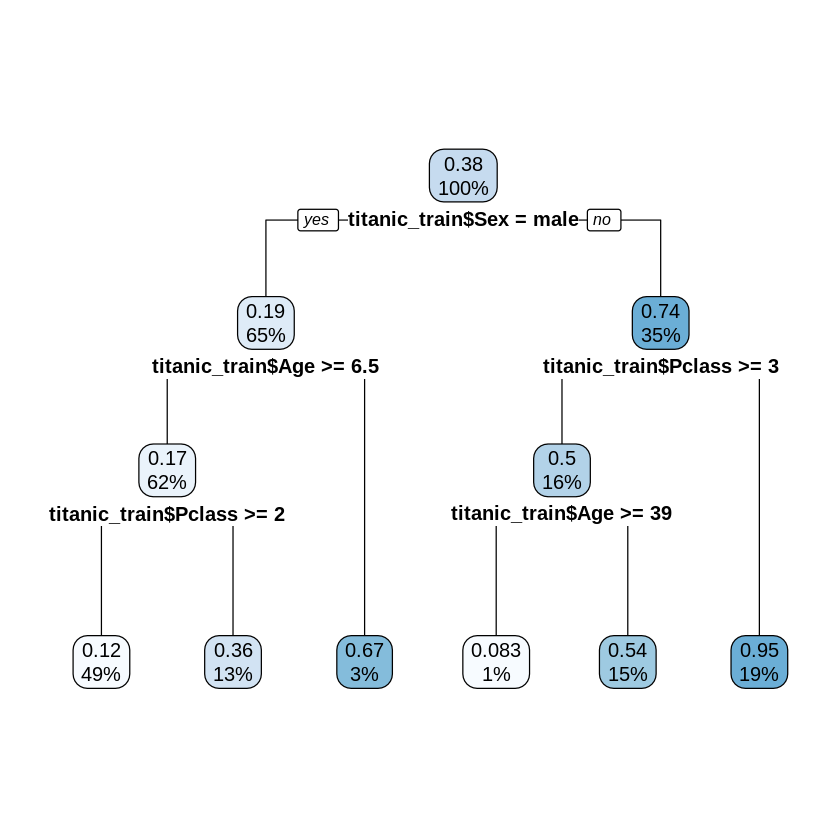

In [7]:
tree_titanic <- rpart(titanic_train$Survived ~titanic_train$Age + titanic_train$Pclass
+ titanic_train$Sex, data = titanic_train)
rpart.plot(tree_titanic)

In [8]:
rpart.rules(tree_titanic)

,titanic_train$Survived,,,,,,,,,,,,
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
12,0.083,when,titanic_train$Sex,is,female,&,titanic_train$Pclass,>=,3,&,titanic_train$Age,>=,38.5
8,0.115,when,titanic_train$Sex,is,male,&,titanic_train$Pclass,>=,2,&,titanic_train$Age,>=,6.5
9,0.358,when,titanic_train$Sex,is,male,&,titanic_train$Pclass,<,2,&,titanic_train$Age,>=,6.5
13,0.538,when,titanic_train$Sex,is,female,&,titanic_train$Pclass,>=,3,&,titanic_train$Age,<,38.5
5,0.667,when,titanic_train$Sex,is,male,,,,,&,titanic_train$Age,<,6.5
7,0.947,when,titanic_train$Sex,is,female,&,titanic_train$Pclass,<,3,,,,
